In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv',usecols=[1])

In [3]:
data

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [4]:
values = data.values.astype('int')

In [5]:
values.shape

(144, 1)

In [6]:
train_size = int(values.shape[0]*0.67)
test_size = values.shape[0] - train_size

In [7]:
train_data = values[0:train_size]
test_data = values[train_size:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
train = scaler.fit_transform(train_data)
test = scaler.transform(test_data)

In [10]:
def create_dataset(data,k):
    dataX,dataY = [],[]
    for i in range(data.shape[0]-k):
        x = data[i:i+k,0]
        dataX.append(x)
        y = data[i+k,0]
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [11]:
look_back = 12
x_test,y_test = create_dataset(test,look_back)

In [12]:
x_train,y_train = create_dataset(train,look_back)

In [13]:
x_train.shape

(84, 12)

In [14]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [15]:
x_train.shape,x_test.shape

((84, 12, 1), (36, 12, 1))

In [16]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [17]:
model = Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=100,batch_size=1)



Epoch 1/100

84/84 [==============================] - 1s 2ms/step - loss: 0.4135
Epoch 2/100
84/84 [==============================] - 0s 1ms/step - loss: 0.1284
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 4/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 5/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 6/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 7/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0158
Epoch 8/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 9/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 10/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 11/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 12/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 13/100
84/84 [==============

84/84 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 95/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 96/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 97/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 98/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 99/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 100/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0064


In [18]:
y_test_pred = model.predict(x_test)

2/2 [==============================] - 0s 3ms/step


In [19]:
y_train_pred = model.predict(x_train)

3/3 [==============================] - 0s 2ms/step


In [20]:
y_test_pred = scaler.inverse_transform(y_test_pred).ravel()
y_train_pred = scaler.inverse_transform(y_train_pred).ravel()

In [21]:
y_test = np.reshape(y_test,(y_test.shape[0],-1))
y_train = np.reshape(y_train,(y_train.shape[0],-1))

In [22]:
y_test = scaler.inverse_transform(y_test).ravel()
y_train = scaler.inverse_transform(y_train).ravel()

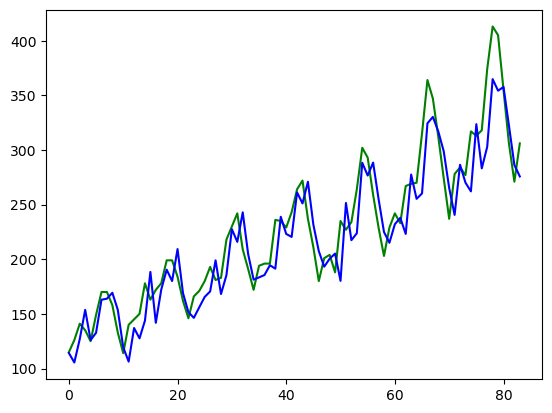

In [23]:
plt.plot(y_train,c='g')
plt.plot(y_train_pred,c='b')

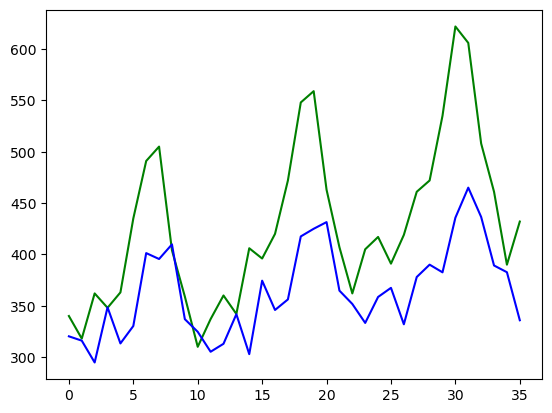

In [24]:
plt.plot(y_test,c='g')
plt.plot(y_test_pred,c='b')

In [25]:
combined_data = np.concatenate((y_train, y_test))
combined_data_pred = np.concatenate((y_train_pred, y_test_pred))

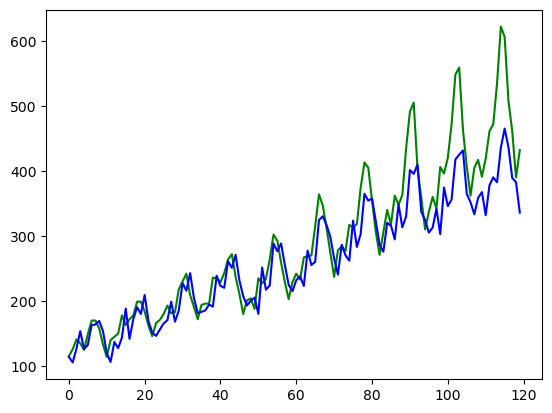

In [26]:
plt.plot(combined_data,'g')
plt.plot(combined_data_pred,'b')